Problem:

- Import xls data into Python
- Plot the Intensity [a.u.]  vs pixels
- Interpolate and convert x-axis from pixels to nm (true wavelength) using Hg lamp data (using data in file: **Lampa_Calibrare_Mercur.xlsx**)
- Find response function of the spectrometer using the tungsten lamp data from file: "**Calibrare Intensitate Oxigen.xlsx**)": $R=\frac{I_{measured}}{I_{true}}$ (where True is computed by Planck's law of radiation (see notes in the pptx above)
- Convert y-axis from Intensity [a.u.] into Intensity in [W/(cm^2*sr*nm)] by dividing the measured Oxygen spectrum with the response function: $I_{oxygen, true}=\frac{I_{oxygen, measured}}{R}$
- Once the spectra is in real units: compute the density of one of the oxygen lines by integrating underneath one of the peaks (see equation from Slide 39 - bottom). We will give all of the constants that are in this equation (see the "I**ntensity_Calibration_Oxygen_Discharge_Solution.xlsx**")


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Hg_data = 'Lampa_Calibrare_Mercur.xlsx'
#Ar_data = 'Spectru Descarcare Argon.xlsx'
Ox_data = 'Calibrare Intensitate Oxigen.xlsx'

df_Hg = pd.read_excel(Hg_data, header=11, engine='openpyxl')
df_Ox = pd.read_excel(Ox_data, header=3, engine='openpyxl')
#df_Ar = pd.read_excel(Ar_data, header=14, engine='openpyxl')


# Trims mercury data to the first 2000 pixels
df_Hg = df_Hg[df_Hg['Pixels']<2000]

## Plot Intensity vs Pixels for mercury

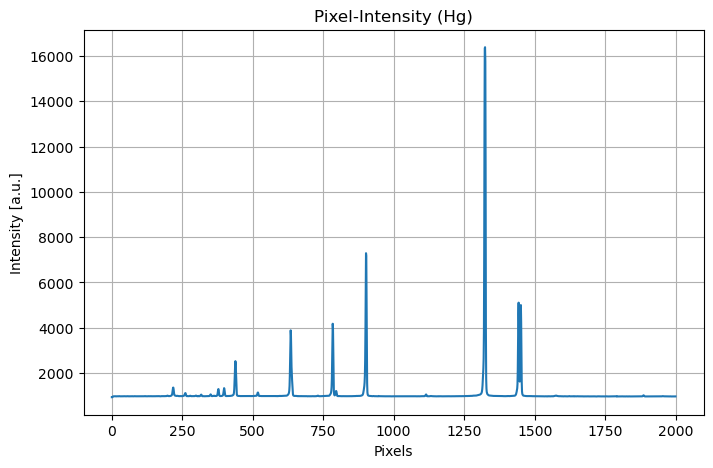

In [2]:
# Plot Hg intensity-pixel plot
plt.figure(figsize=(8,5))
plt.plot(df_Hg['Pixels'], df_Hg['Intensity'], linestyle='-')
plt.xlabel('Pixels')
plt.ylabel('Intensity [a.u.]')
plt.title('Pixel-Intensity (Hg)')
plt.grid(True)
plt.show()

## Calibrate length dimension

In [4]:
C = np.polyfit(df_Hg['Pixels'],df_Hg['Intensity'],3)

lambda_Hg = lambda p : C[3] + C[2]*p+C[1]*p**2+C[0]*p**3

lambda_calibrated = lambda_Hg(df_Hg['Pixel'])


# Plot Hg intensity-wavelength plot
plt.figure(figsize=(8,5))
plt.plot(lambda_Hg, df_Hg['Intensity'], linestyle='-')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Intensity [a.u.]')
plt.title('Wavelength-Intensity (Hg)')
plt.grid(True)
plt.show()

KeyError: 'Pixel'

## Calibrate intensity dimension

In [ ]:
"""
epsilon = # Surface emissivity
lambd =

I_W_true = epsilon*((2hc**2)/(lambd**5)*1/(e**(hc/kT)-1))
I_W_meas= df_Ox['I_Tungsten [a.u.]']
R=I_W_meas/I_W_true
I_plasma_meas=R*I_plasma_true
"""